<a href="https://colab.research.google.com/github/seokjinwoo/EconBigData/blob/main/lec8_%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 외부데이터 사용하는 방법(open API), 10장

- API: application program interface
- pykrx: 한국 거래소의 open API 를 관리해주는 모듈
- ticker: 기업 ID
- 시가, 고가, 저가, 종가, 거래량 등

- 다른 open API 서비스들은 key 를 발급 받아서 사용

- Yahoo Finance (yfinance)

In [ ]:
# !pip install pykrx

In [ ]:
# 삼성전자: 005930

import pandas as pd
from pykrx import stock
import matplotlib.pyplot as plt

df = stock.get_market_ohlcv_by_date(
    fromdate="20200101",
    todate = "20251020",
    ticker = "005930")

# df.tail()


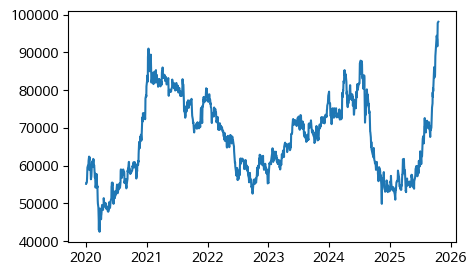

In [ ]:
# 삼성전자 주가 추이

plt.figure(figsize=(5, 3))

plt.plot(df.index, df['종가'])

plt.show()



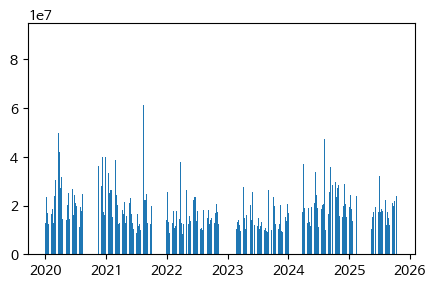

In [ ]:
# 가로축: 날짜, 세로축: 거래량
# bar plot을 이용해서 그려보시오.

plt.figure(figsize=(5, 3))

plt.bar(df.index, df['거래량'])

plt.show()

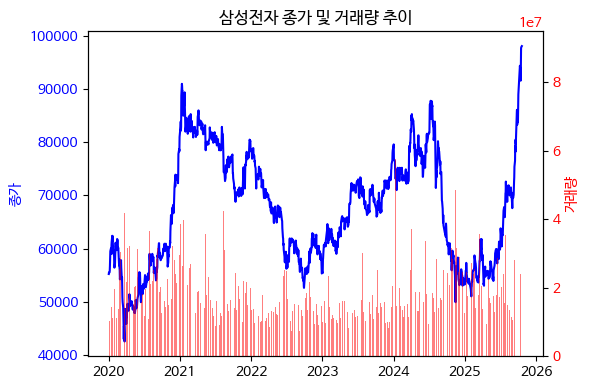

In [ ]:
# 종가 추이와 거래량을 그리되
# 왼쪽 세로축은 종가, 오른쪽 세로축은 거래량을 표시

fig, ax1 = plt.subplots(figsize=(6, 4))

# Plotting closing price on the primary y-axis
ax1.plot(df.index, df['종가'], color='blue', label='종가')
ax1.set_ylabel('종가', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Creating a secondary y-axis for trading volume
ax2 = ax1.twinx()
ax2.bar(df.index, df['거래량'], color='red', alpha=0.5, label='거래량')
ax2.set_ylabel('거래량', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Adding title and legend
plt.title('삼성전자 종가 및 거래량 추이')
fig.tight_layout()
plt.show()

In [ ]:
# 동일한 그림을 "현대자동차"에 대해서 그려보시오.


# 회귀분석(regression analysis)

- 제일 중요. 계량경제학, 인공지능에서도 가장 중요한 분석 도구.

- $y$를 $x$로 설명한다.
  - $y$: 종속변수(dependent variable), 피설명변수(explained)
  - $x$: 독립변수(independent variable), 설명변수(explanatory)

$$
y_i = \beta_0 + \beta_1 x_i + e_i, i=1,\dots, n
$$  

- 경제학에서 대표적인 회귀모형
  - 수요함수: 수요량을 가격으로 설명한다.
  - 필립스 곡선: 인플레이션과 실업의 관계를 설명한다.
  - Mincer의 임금방정식: 임금을 연령 혹은 경력으로 설명한다(로그 선형이다).

In [ ]:
# galton.csv 파일 업로드

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('/content/galton.csv')


- regression to mediocrity (mean reversion property)

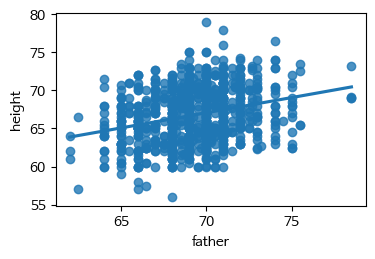

In [ ]:
# 가로축: 아빠의 키(father), 세로축: 자녀의 키(height)
# 산포도

plt.figure(figsize=(4, 2.5))
# sns.scatterplot(data=df, x='father', y='height')
sns.regplot(data=df, x='father', y='height', ci=False)
plt.show()
# 모

## 모형이 추정

- 회귀선을 어떻게 구하면 되느냐?
- 틀린 것, 설명안된 것, $e_i^2$의 합을 작게 만들면 좋겠다.
- 오차제곱의 합(sum of squared residuals, SSR)

$$
SSR = \sum_{i=1}^n e_i^2
$$